
<h1 align="center">Graph Convolutional Network (GCN)</h1>



**GNN**: Graph Neural Networks (GNN) is a class of ANN for processing data that can be represented as graphs.

**Graph**: collection of nodes that are connected by edges.

**Types Of GNN**:
  - Graph Convolutional Network(GCN):Is the solution to the limitation of Convolutional Neural Networks (CNN) as CNNs fail on graphs. Or, GCNs are the generalized version of CNN that can work on data with underlying non-regular structures.

  - Graph Auto-encoder Network: Integration of two networks, an encoder that downsamples the input by transferring it through convolutional filters to provide a compact feature representation of the image, and a decoder that takes the encoder's interpretation as input and tries to reconstruct the input based on it. 


##First Example

###Building Graph Convolutional Networks

**Steps**:

1. Initializing the Graph G
2. Inserting Adjacency Matrix (A) to Forward Pass Equation
3. Inserting Self-Loops and Normalizing A
4. Adding Weights and Activation Function
5. Plotting the Features Representations


### Import The Required Libraries

In [17]:
import networkx as nx #Provides classes for graphs which allow multiple edges between any pair of nodes.

import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import fractional_matrix_power

### Initialize the graph

Graph Info:
 Graph named 'Graph' with 6 nodes and 7 edges

Graph Nodes:  [(0, {'name': 0}), (1, {'name': 1}), (2, {'name': 2}), (3, {'name': 3}), (4, {'name': 4}), (5, {'name': 5})]


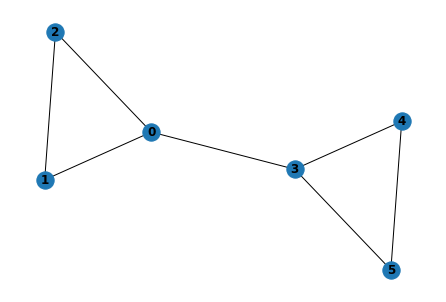

In [18]:
G = nx.Graph(name="Graph") #Initialize the graph


#Create nodes
for i in range(6): #Creating 6 nodes
  G.add_node(i, name=i)


#Define the edges
edges = [(0,1),(0,2),(1,2),(0,3),(3,4),(3,5),(4,5)] #Total 7 edges
G.add_edges_from(edges)


print('Graph Info:\n', nx.info(G)) #Display graph info
print('\nGraph Nodes: ', G.nodes.data()) #Inspect the node features


# Plot the graph
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

### Inserting Adjacency Matrix (A) to Forward Pass Equation
- The insertion of Adjacency Matrix (A) in the forward pass equation of GCNs enable the model to learn the features of neighboring nodes.

In [19]:
#Get the Adjacency Matrix (A) and Node Features Matrix (X) as numpy array
A = np.array(nx.attr_matrix(G, node_attr='name')[0])
X = np.array(nx.attr_matrix(G, node_attr='name')[1])
X = np.expand_dims(X,axis=1)

print('Shape of A: ', A.shape)
print('\nShape of X: ', X.shape)
print('\nAdjacency Matrix (A):\n', A)
print('\nNode Features Matrix (X):\n', X)

Shape of A:  (6, 6)

Shape of X:  (6, 1)

Adjacency Matrix (A):
 [[0. 1. 1. 1. 0. 0.]
 [1. 0. 1. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1. 1.]
 [0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 1. 1. 0.]]

Node Features Matrix (X):
 [[0]
 [1]
 [2]
 [3]
 [4]
 [5]]


**Now, let’s investigate how by inserting A into the forward pass equation adds to richer feature representation of the model.**

In [20]:
#Dot product Adjacency Matrix (A) and Node Features (X)
AX = np.dot(A,X)
print("Dot product of A and X (AX):\n", AX)

Dot product of A and X (AX):
 [[6.]
 [2.]
 [1.]
 [9.]
 [8.]
 [7.]]


###Inserting Self-Loops and Normalizing A
* To address this problem, we now add self-loops to each node of A. Adding self-loops is basically a mechanism to connect a node to itself.
* Let’s call A with self-loops added as A_hat and recalculate AX, which is now the dot product of A_hat and X 

In [21]:
#Add Self Loops
G_self_loops = G.copy()

self_loops = []
for i in range(G.number_of_nodes()):
    self_loops.append((i,i))

G_self_loops.add_edges_from(self_loops)

#Check the edges of G_self_loops after adding the self loops
print('Edges of G with self-loops:\n', G_self_loops.edges)

#Get the Adjacency Matrix (A) and Node Features Matrix (X) of added self-lopps graph
A_hat = np.array(nx.attr_matrix(G_self_loops, node_attr='name')[0])
print('Adjacency Matrix of added self-loops G (A_hat):\n', A_hat)

#Calculate the dot product of A_hat and X (AX)
AX = np.dot(A_hat, X)
print('AX:\n', AX)

Edges of G with self-loops:
 [(0, 1), (0, 2), (0, 3), (0, 0), (1, 2), (1, 1), (2, 2), (3, 4), (3, 5), (3, 3), (4, 5), (4, 4), (5, 5)]
Adjacency Matrix of added self-loops G (A_hat):
 [[1. 1. 1. 1. 0. 0.]
 [1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0.]
 [1. 0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1.]]
AX:
 [[ 6.]
 [ 3.]
 [ 3.]
 [12.]
 [12.]
 [12.]]


**we need to normalize the features to prevent numerical instabilities and vanishing/exploding gradients in order for the model to converge. In GCNs, we normalize our data by calculating the Degree Matrix (D) and performing dot product operation of the inverse of D with AX**

In [22]:

#Get the Degree Matrix of the added self-loops graph
Deg_Mat = G_self_loops.degree() #In graph terminology, the term “degree” refers to the number of edges a node is connected to.
print('Degree Matrix of added self-loops G (D): ', Deg_Mat)

#Convert the Degree Matrix to a N x N matrix where N is the number of nodes
D = np.diag([deg for (n,deg) in list(Deg_Mat)])
print('Degree Matrix of added self-loops G as numpy array (D):\n', D)

#Find the inverse of Degree Matrix (D)
D_inv = np.linalg.inv(D)
print('Inverse of D:\n', D_inv)

#Dot product of D and AX for normalization
DAX = np.dot(D_inv,AX)
print('DAX:\n', DAX)

Degree Matrix of added self-loops G (D):  [(0, 5), (1, 4), (2, 4), (3, 5), (4, 4), (5, 4)]
Degree Matrix of added self-loops G as numpy array (D):
 [[5 0 0 0 0 0]
 [0 4 0 0 0 0]
 [0 0 4 0 0 0]
 [0 0 0 5 0 0]
 [0 0 0 0 4 0]
 [0 0 0 0 0 4]]
Inverse of D:
 [[0.2  0.   0.   0.   0.   0.  ]
 [0.   0.25 0.   0.   0.   0.  ]
 [0.   0.   0.25 0.   0.   0.  ]
 [0.   0.   0.   0.2  0.   0.  ]
 [0.   0.   0.   0.   0.25 0.  ]
 [0.   0.   0.   0.   0.   0.25]]
DAX:
 [[1.2 ]
 [0.75]
 [0.75]
 [2.4 ]
 [3.  ]
 [3.  ]]


**In the paper, Kipf and Welling states that doing symmetric normalization will make dynamics more interesting, hence, the normalization equation is modified from:**

$normalizing-term = D^{-1} A$

To

$normalizing-term = D^{-1/2} A D^{-1/2}$


In [23]:
#Symmetrically-normalization
D_half_norm = fractional_matrix_power(D, -0.5)
DADX = D_half_norm.dot(A_hat).dot(D_half_norm).dot(X)
print('DADX:\n', DADX)

DADX:
 [[1.27082039]
 [0.75      ]
 [0.75      ]
 [2.61246118]
 [2.92082039]
 [2.92082039]]


###Adding Weights and Activation Function

In [24]:
#Initialize the weights
np.random.seed(77777)
n_h = 4 #number of neurons in the hidden layer
n_y = 2 #number of neurons in the output layer
W0 = np.random.randn(X.shape[1],n_h) * 0.01
W1 = np.random.randn(n_h,n_y) * 0.01

#Implement ReLu as activation function
def relu(x):
    return np.maximum(0,x)

#Build GCN layer
#In this function, we implement numpy to simplify
def gcn(A,H,W):
    I = np.identity(A.shape[0]) #create Identity Matrix of A
    A_hat = A + I #add self-loop to A
    D = np.diag(np.sum(A_hat, axis=0)) #create Degree Matrix of A
    D_half_norm = fractional_matrix_power(D, -0.5) #calculate D to the power of -0.5
    eq = D_half_norm.dot(A_hat).dot(D_half_norm).dot(H).dot(W)
    return relu(eq)


#Do forward propagation
H1 = gcn(A,X,W0)
H2 = gcn(A,H1,W1)
print('Features Representation from GCN output:\n', H2)

Features Representation from GCN output:
 [[0.00027758 0.        ]
 [0.00017298 0.        ]
 [0.00017298 0.        ]
 [0.00053017 0.        ]
 [0.00054097 0.        ]
 [0.00054097 0.        ]]


**Done! just built first feed-forward GCN model!**

###Plotting the Features Representations

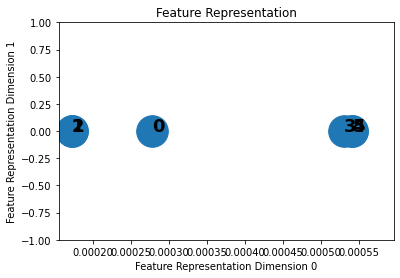

In [25]:
def plot_features(H2):
    #Plot the features representation
    x = H2[:,0]
    y = H2[:,1]

    size = 1000

    plt.scatter(x,y,size)
    plt.xlim([np.min(x)*0.9, np.max(x)*1.1])
    plt.ylim([-1, 1])
    plt.xlabel('Feature Representation Dimension 0')
    plt.ylabel('Feature Representation Dimension 1')
    plt.title('Feature Representation')

    for i,row in enumerate(H2):
        str = "{}".format(i)
        plt.annotate(str, (row[0],row[1]),fontsize=18, fontweight='bold')

    plt.show()


plot_features(H2)

##Cora dataset node classification with Graph Convolutional Network (GCN)
- We will use **StellarGraph**: it is a Python library for machine learning on graphs and networks. Doc(https://stellargraph.readthedocs.io/en/stable/README.html)

**steps:**

* Prepared the data using common data science libraries

* Built a TensorFlow Keras model and data generator with the StellarGraph library

* Trained and evaluated it using TensorFlow and other libraries

### Import libraries

In [26]:
!pip install stellargraph

In [27]:
import pandas as pd
import os

import stellargraph as sg
from stellargraph.mapper import FullBatchNodeGenerator
from stellargraph.layer import GCN

from tensorflow.keras import layers, optimizers, losses, metrics, Model
from sklearn import preprocessing, model_selection
import matplotlib.pyplot as plt
%matplotlib inline

### Data Preparation
**Got the codes from the documentation of sg library**

In [28]:
# load the dataset
dataset = sg.datasets.Cora()
G, node_subjects = dataset.load()
print(G.info())

StellarGraph: Undirected multigraph
 Nodes: 2708, Edges: 5429

 Node types:
  paper: [2708]
    Features: float32 vector, length 1433
    Edge types: paper-cites->paper

 Edge types:
    paper-cites->paper: [5429]
        Weights: all 1 (default)
        Features: none


In [29]:
node_subjects.value_counts().to_frame()

,subject
Neural_Networks,818
Probabilistic_Methods,426
Genetic_Algorithms,418
Theory,351
Case_Based,298
Reinforcement_Learning,217
Rule_Learning,180


In [30]:
# spliting the data
train_subjects, test_subjects = model_selection.train_test_split( node_subjects,
                                                                  train_size=140, 
                                                                  test_size=None, 
                                                                  stratify=node_subjects)
val_subjects, test_subjects = model_selection.train_test_split( test_subjects, 
                                                                train_size=500, 
                                                                test_size=None, 
                                                                stratify=test_subjects)

In [31]:
train_subjects.value_counts().to_frame()

,subject
Neural_Networks,42
Probabilistic_Methods,22
Genetic_Algorithms,22
Theory,18
Case_Based,16
Reinforcement_Learning,11
Rule_Learning,9


In [32]:
# Converting to numeric arrays
target_encoding = preprocessing.LabelBinarizer()

train_targets = target_encoding.fit_transform(train_subjects)
val_targets = target_encoding.transform(val_subjects)
test_targets = target_encoding.transform(test_subjects)

###Creating the GCN layers

In [33]:
generator = FullBatchNodeGenerator(G, method="gcn")

Using GCN (local pooling) filters...


In [34]:
train_gen = generator.flow(train_subjects.index, train_targets)

In [35]:
gcn = GCN(layer_sizes=[16, 16], #the number of hidden GCN layers and their sizes
          activations=["relu", "relu"], 
          generator=generator, 
          dropout=0.5)

**To create a Keras model we now expose the input and output tensors of the GCN model for node prediction, via the GCN.in_out_tensors method**

In [37]:
x_inp, x_out = gcn.in_out_tensors()

x_out

<KerasTensor: shape=(1, None, 16) dtype=float32 (created by layer 'gather_indices_1')>

In [38]:
predictions = layers.Dense(units=train_targets.shape[1], activation="softmax")(x_out)


### Training and evaluating

In [39]:
model = Model(inputs=x_inp, outputs=predictions)

model.compile(optimizer=optimizers.Adam(lr=0.01),
              loss=losses.categorical_crossentropy,
              metrics=["acc"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [40]:
val_gen = generator.flow(val_subjects.index, val_targets)


In [41]:
from tensorflow.keras.callbacks import EarlyStopping

es_callback = EarlyStopping(monitor="val_acc", patience=50, restore_best_weights=True)

In [42]:
history = model.fit(train_gen,
                    epochs=200,
                    validation_data=val_gen,
                    shuffle=False,  # this should be False, since shuffling data means shuffling the whole graph
                    callbacks=[es_callback])

Epoch 1/200
1/1 [==============================] - 3s 3s/step - loss: 1.9630 - acc: 0.1214 - val_loss: 1.9095 - val_acc: 0.4460
Epoch 2/200
1/1 [==============================] - 0s 257ms/step - loss: 1.9080 - acc: 0.3786 - val_loss: 1.8685 - val_acc: 0.3880
Epoch 3/200
1/1 [==============================] - 0s 234ms/step - loss: 1.8507 - acc: 0.5143 - val_loss: 1.8133 - val_acc: 0.3920
Epoch 4/200
1/1 [==============================] - 0s 324ms/step - loss: 1.7653 - acc: 0.5643 - val_loss: 1.7482 - val_acc: 0.4380
Epoch 5/200
1/1 [==============================] - 0s 284ms/step - loss: 1.7137 - acc: 0.5214 - val_loss: 1.6771 - val_acc: 0.4920
Epoch 6/200
1/1 [==============================] - 0s 486ms/step - loss: 1.6195 - acc: 0.5929 - val_loss: 1.6049 - val_acc: 0.5540
Epoch 7/200
1/1 [==============================] - 0s 429ms/step - loss: 1.5107 - acc: 0.6429 - val_loss: 1.5293 - val_acc: 0.5960
Epoch 8/200
1/1 [==============================] - 0s 467ms/step - loss: 1.4084 - acc:

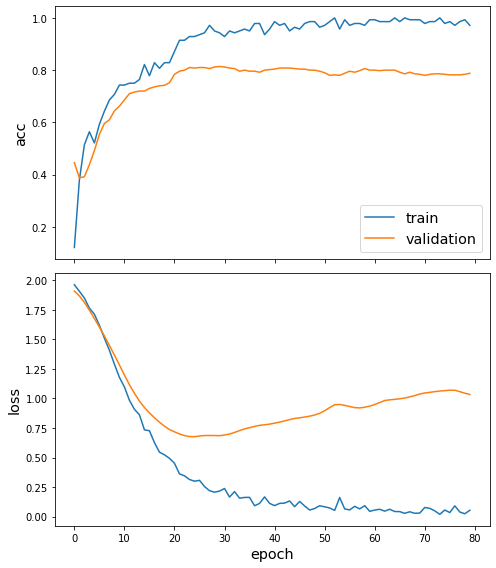

In [43]:
sg.utils.plot_history(history)

In [44]:
test_gen = generator.flow(test_subjects.index, test_targets)

test_metrics = model.evaluate(test_gen)
print("\nTest Set Metrics:")
for name, val in zip(model.metrics_names, test_metrics):
    print("\t{}: {:0.4f}".format(name, val))

1/1 [==============================] - 0s 115ms/step - loss: 0.6412 - acc: 0.8162

Test Set Metrics:
	loss: 0.6412
	acc: 0.8162


###making prediction

In [46]:
all_nodes = node_subjects.index
all_gen = generator.flow(all_nodes)
all_predictions = model.predict(all_gen)

In [47]:
node_predictions = target_encoding.inverse_transform(all_predictions.squeeze())

In [48]:
df = pd.DataFrame({"Predicted": node_predictions, "True": node_subjects})
df.head(20)

,Predicted,True
31336,Neural_Networks,Neural_Networks
1061127,Rule_Learning,Rule_Learning
1106406,Reinforcement_Learning,Reinforcement_Learning
13195,Reinforcement_Learning,Reinforcement_Learning
37879,Probabilistic_Methods,Probabilistic_Methods
1126012,Probabilistic_Methods,Probabilistic_Methods
1107140,Theory,Theory
1102850,Neural_Networks,Neural_Networks
31349,Neural_Networks,Neural_Networks
1106418,Theory,Theory


###Node Embeddings

In [49]:
embedding_model = Model(inputs=x_inp, outputs=x_out)

emb = embedding_model.predict(all_gen)
emb.shape

(1, 2708, 16)

**There are many tools for this dimensionality reduction task, many of which are offered by scikit-learn. Two of the more common ones are principal component analysis (PCA) (which is linear) and t-distributed Stochastic Neighbor Embedding (t-SNE or TSNE) (non-linear). t-SNE is slower but typically gives nicer results for plotting.**

In [50]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

transform = TSNE  # or PCA

In [51]:
X = emb.squeeze(0)
X.shape

(2708, 16)

In [52]:
trans = transform(n_components=2)
X_reduced = trans.fit_transform(X)
X_reduced.shape

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(2708, 2)

[Text(0, 0.5, '$X_2$'),
 Text(0.5, 0, '$X_1$'),
 Text(0.5, 1.0, 'TSNE visualization of GCN embeddings for cora dataset'),
 None]

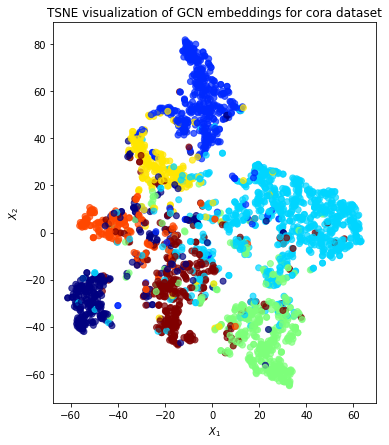

In [53]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(X_reduced[:, 0],
           X_reduced[:, 1],
           c=node_subjects.astype("category").cat.codes,
           cmap="jet",
           alpha=0.7)
ax.set(aspect="equal",
       xlabel="$X_1$",
       ylabel="$X_2$",
       title=f"{transform.__name__} visualization of GCN embeddings for cora dataset")